# <center><i> Exploratory Data Analysis (EDA) for sentiment analysis model</i></center>
<br>
<center>by Green AI Innovations</center>
<br>

#### <b>Introduction:</b> <br>
This document presents a Exploratory Data Analysis performed on collected data for one of the models in the proposed pipeline - Sentiment Analysis Model.<br>
<br>
Emotion detection from text is one of the challenging problems in Natural Language Processing. <br>
The reason is the unavailability of labeled dataset and the multi-class nature of the problem. <br>
Humans have a variety of emotions and it is difficult to collect enough records for each emotion and hence the problem of class imbalance arises.<br>
<br>
Exploratory Data Analysis (EDA) is a process of analyzing and understanding the underlying patterns, trends, and relationships in the data. <br>
It involves visualizing and summarizing the data using statistical techniques to uncover any hidden insights or anomalies. <br>
EDA is typically performed as a preliminary step in data analysis to gain an understanding of the data before further analysis or modeling.<br>
<br>
In the context of sentiment analysis, EDA can help to identify the distribution of sentiment classes, the most common words used in different sentiment categories, <br>
and the relationship between sentiment and other variables such as time, location, or demographics. EDA can also help to identify potential data quality issues, <br>
such as missing or inconsistent data, that may need to be addressed before building a sentiment analysis model.<br>
<br>
Some common techniques used in EDA include data visualization using histograms, scatterplots, or boxplots, summary statistics such as mean, median, or standard deviation, <br>
and correlation analysis to identify relationships between variables. The insights gained from EDA can help to inform the feature engineering process, <br>
improve the accuracy of the sentiment analysis model, and ultimately provide valuable insights into the sentiment expressed in textual data.<br>
<br>
A sentiment analysis model is a type of natural language processing (NLP) model that is designed to identify and extract the sentiment expressed in a piece of text. <br>
The goal of a sentiment analysis model is to determine whether the sentiment of the text is positive, negative, or neutral. Sentiment analysis models can be used to analyze various types of text data, <br>
including social media posts, product reviews, customer feedback, and news articles.<br>
<br>
Sentiment analysis models typically use machine learning algorithms to classify the sentiment of the text. These algorithms are trained on a labeled dataset of text data, <br>
where each text is labeled with its corresponding sentiment (positive, negative, or neutral). The machine learning model then learns to identify patterns and features in the data that are associated with different sentiment classes.<br>
<br>
There are several approaches to building a sentiment analysis model, including rule-based approaches, lexicon-based approaches, and machine learning approaches. <br>
Rule-based approaches use a set of predefined rules to identify the sentiment of the text, while lexicon-based approaches use a sentiment lexicon (a dictionary of words and their associated sentiment) to classify the sentiment. <br>
Machine learning approaches use algorithms such as decision trees, support vector machines, or neural networks to learn the patterns and features in the data and classify the sentiment.<br>
<br>
Sentiment analysis models can provide valuable insights into the sentiment expressed in textual data and are widely used in various industries, including marketing, <br>
customer service, and social media analysis. However, like any machine learning model, <br>
the accuracy of a sentiment analysis model depends on the quality of the data used to train it and the features used to classify the sentiment. <br>
Therefore, it is essential to perform EDA and carefully engineer features before building a sentiment analysis model.<br>
<br>

#### <b>Datasets:</b> <br>
The datasets collected during data sourcing and research used in this EDA and for modelling purposes in later phases of the project:<br> 
- <a href="https://www.kaggle.com/datasets/faisalsanto007/isear-dataset">ISEAR Dataset </a> with almost 7000 tweets with labeled emotions.<br>
- <a href="https://www.kaggle.com/datasets/parulpandey/emotion-dataset">Emotion Dataset </a>, dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.<br>
- <a href="https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp">Emotions dataset for NLP </a>,list of documents with emotion flag<br>
- <a href="https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text">Emotion Detection from Text </a>,collection of tweets annotated with the emotions behind them<br>

#### <b>EDA goals:</b> <br>
The primary goals of EDA for sentiment analysis model data are as follows:<br>

- Identify the Distribution of Sentiments: EDA helps to identify the distribution of sentiment classes (positive, negative, or neutral) in the dataset. <br>
This information is critical as it can help determine the balance of the data, i.e., if it is skewed towards a particular sentiment class.<br>

- Identify the Most Common Words: EDA can help to identify the most common words used in positive and negative sentiment classes. <br>
This information is useful as it can help to identify the language used in different sentiment classes and can be used to build features for the sentiment analysis model.<br>

- Analyze the Relationship between Sentiment and Other Variables: EDA can help to analyze the relationship between sentiment and other variables such as time, location, or demographics. <br>
This information can help to identify patterns and trends in the data and can be used to build more accurate sentiment analysis models.<br>

- Identify Data Quality Issues: EDA can help to identify potential data quality issues such as missing or inconsistent data, which may need to be addressed before building a sentiment analysis model.<br>

- Inform Feature Engineering: EDA can provide valuable insights into the data, which can be used to engineer features for the sentiment analysis model. <br>
These features can help to improve the accuracy of the model and provide more valuable insights into the sentiment expressed in the textual data.<br>

In summary, EDA is a critical step in developing a sentiment analysis model. <br>
It helps to identify the distribution of sentiments, common language patterns, the relationship between sentiment and other variables, potential data quality issues, and informs the feature engineering process.<br>

#### <b>Planning:</b> <br>

1. Loading libraries & Data<br>

2. Data Cleaning<br>

3. Exploratory Data Analysis (EDA)<br>

4. Conclusion <br>
<br>
<br>
<hr style="height:1px; border-width:0; color:gray; background-color:gray">

#### <b>1. Loading libraries & data:</b> <br>
<br>

In [59]:
# Optional install
# pip install opendatasets

In [60]:
# Optional install
# pip install contractions

In [61]:
# Import libraries required for this notebook
import nltk
import string
import pandas as pd
import opendatasets as od
import copy
import contractions
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

# Optional download
# nltk.download('stopwords')

In [62]:
# ISEAR dataset
isear_dataset = pd.read_csv("isear-dataset/eng_dataset.csv")

# Emotion Dataset
emotion_dataset_test = pd.read_csv("emotion-dataset/test.csv")
emotion_dataset_training = pd.read_csv("emotion-dataset/training.csv")
emotion_dataset_validation = pd.read_csv("emotion-dataset/validation.csv")

# Emotions dataset for NLP
emotions_dataset_for_nlp_test = pd.read_csv("emotions-dataset-for-nlp/test.txt", header=None)
emotions_dataset_for_nlp_training = pd.read_csv("emotions-dataset-for-nlp/train.txt", header=None)
emotions_dataset_for_nlp_validation = pd.read_csv("emotions-dataset-for-nlp/val.txt", header=None)

# Emotion detection from text dataset
emotion_detection_from_text = pd.read_csv("emotion-detection-from-text/tweet_emotions.csv")
emotion_detection_from_text = emotion_detection_from_text.drop('tweet_id', axis=1)

#### <b>2. Data Cleaning:</b> <br>
<br>
Data cleaning is a crucial step in the data analysis process that involves identifying and correcting errors and inconsistencies in the data before analysis. <br>
The importance of data cleaning can be summarized in the following points:<br>

- Improving Data Quality: Data cleaning helps to improve the quality of the data by removing errors and inconsistencies. <br>
This improves the accuracy and reliability of the analysis, which leads to more informed decision-making.<br>

- Preventing Bias: Inaccurate or inconsistent data can introduce bias into the analysis, leading to incorrect conclusions and decisions. <br>
Data cleaning helps to prevent bias by identifying and correcting errors in the data.<br>

- Enhancing Efficiency: Data cleaning can help to save time and resources by reducing the need to redo analysis or correct errors discovered later in the analysis process.<br>

- Ensuring Compatibility: Data cleaning ensures that data is compatible with the tools and techniques used for analysis. <br>
This is especially important when working with multiple data sources or integrating data from different systems.<br>

- Facilitating Interpretation: Clean data is easier to interpret and analyze, allowing for more straightforward communication of findings and conclusions.<br>

In summary, data cleaning is essential to ensure the accuracy, reliability, and compatibility of data used for analysis. <br>
It helps to prevent bias, improve efficiency, and facilitate interpretation, all of which are critical for making informed decisions based on data analysis.<br>

In [63]:
############################### ISEAR dataset ###############################
# ISEAR dataset, drop ID column
isear_dataset = isear_dataset.drop('ID', 
                                   axis=1)

# ISEAR dataset, rename columns
isear_dataset.rename(columns={'sentiment': 'emotion', 
                              'content': 'text'}, 
                              inplace=True)

############################### Emotion Dataset ##############################
# Emotion Dataset, rename columns
emotion_dataset_test.rename(columns={'label': 'emotion'}, 
                            inplace=True)
emotion_dataset_training.rename(columns={'label': 'emotion'}, 
                                inplace=True)
emotion_dataset_validation.rename(columns={'label': 'emotion'}, 
                                  inplace=True)

# Emotion Dataset, renaming sadness to (0), joy to (1), love to (2), anger to (3), fear to (4).
dct = {0: "sadness", 
       1: "joy", 
       2: "love", 
       3: "anger", 
       4: "fear", 
       5: "surprise"}
emotion_dataset_test["emotion"].replace(dct, 
                                        inplace=True)
emotion_dataset_training["emotion"].replace(dct, 
                                            inplace=True)
emotion_dataset_validation["emotion"].replace(dct, 
                                              inplace=True)

############################### Emotions dataset for NLP ###############################
# Emotions dataset for NLP, split a column in 2, at the ";" symbol
emotions_dataset_for_nlp_test = emotions_dataset_for_nlp_test[0].str.split(";", 
                                                                           n = 1, 
                                                                           expand = True)
emotions_dataset_for_nlp_training = emotions_dataset_for_nlp_training[0].str.split(";", 
                                                                                   n = 1, 
                                                                                   expand = True)
emotions_dataset_for_nlp_validation = emotions_dataset_for_nlp_validation[0].str.split(";", 
                                                                                       n = 1, 
                                                                                       expand = True)

# Emotions dataset for NLP, rename columns
emotions_dataset_for_nlp_test.rename(columns={0: 'text', 
                                              1: 'emotion'}, 
                                              inplace=True)
emotions_dataset_for_nlp_training.rename(columns={0: 'text', 
                                                  1: 'emotion'}, 
                                                  inplace=True)
emotions_dataset_for_nlp_validation.rename(columns={0: 'text', 
                                                    1: 'emotion'}, 
                                                    inplace=True)

############################### Emotion detection from text dataset ###############################
# Emotion detection from text dataset, rename columns
emotion_detection_from_text.rename(columns={'sentiment': 'emotion', 
                                            'content': 'text'}, 
                                            inplace=True)


# Print results
print(isear_dataset.columns)
print(emotion_dataset_test.columns)
print(emotion_dataset_training.columns)
print(emotion_dataset_validation.columns)
print(emotions_dataset_for_nlp_test.columns)
print(emotions_dataset_for_nlp_training.columns)
print(emotions_dataset_for_nlp_validation.columns)
print(emotion_detection_from_text.columns)

Index(['emotion', 'text'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['text', 'emotion'], dtype='object')
Index(['emotion', 'text'], dtype='object')


In [64]:
# Concatenating all dataframes along rows
data = pd.concat([isear_dataset, 
                  emotion_dataset_test, 
                  emotion_dataset_training, 
                  emotion_dataset_validation, 
                  emotions_dataset_for_nlp_test, 
                  emotions_dataset_for_nlp_training, 
                  emotions_dataset_for_nlp_validation, 
                  emotion_detection_from_text], 
                  axis=0)

# Align the names
dct1 = {"joy": "happiness"}
data["emotion"].replace(dct1, inplace=True)

# Print results
print('Shape of dataframe: ', data.shape)
print('')
print('Columns of dataframe: ', data.columns)
print('')
print('Unique emotion names: ', pd.unique(data["emotion"]))

Shape of dataframe:  (87102, 2)

Columns of dataframe:  Index(['emotion', 'text'], dtype='object')

Unique emotion names:  ['anger' 'fear' 'happiness' 'sadness' 'love' 'surprise' 'empty'
 'enthusiasm' 'neutral' 'worry' 'fun' 'hate' 'boredom' 'relief']


In [65]:
# Setting the stopwords parameter to english language
stop_words = set(stopwords.words('english'))

############################### Defining functions ###############################
# Function replacing abbreviations with full word versions
def expand_contractions(text):
    return contractions.fix(text)

# Function cleaning the text from various different add-ons
def clean_content(text):

    text = expand_contractions(text)
    
    # remove twitter handles
    clean_text = re.sub(r'@\w+\s?', '', text)
    
    # remove twitter hashtags
    clean_text = re.sub(r'#\w+\s?', '', clean_text)
    
    # convert to lowercase
    clean_text = clean_text.lower()
    
    # remove links http:// or https://
    clean_text = re.sub(r'https?:\/\/\S+', '', clean_text)
    
    # remove links beginning with www. and ending with .com
    clean_text = re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)', '', clean_text)
    
    # remove html reference characters
    clean_text = re.sub(r'&[a-z]+;', '', clean_text)

    return clean_text

# Function converting emojis to chars
def remove_special_characters(text): 
    x = re.sub(r'[^A-Za-z0-9 ]+', '', str(text))
    return x

# Function to remove punctuations
def remove_punctuation(text):
    txt = copy.deepcopy(text)
    for punctuation in string.punctuation:     
        txt = txt.replace(punctuation, '')
    return txt
    
# Function to clean text. Remove tagged entities, hyperlinks, emojis
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", ' ', str(text))
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', str(text))
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', str(text))
    text = re.sub('\t', ' ',  str(text))
    text = re.sub(r" +", ' ', str(text))
    return text

In [66]:
# Call the function to clean input text
data['text'] = data['text'].apply(clean_text)
data['text'] = data['text'].apply(lambda x :  clean_content(x))

# Apply the stopwords
data['text'] = data['text'].apply(lambda x: [item for item in x.split() if item not in stop_words]).apply(lambda x:" ".join(x))

# Call emoji converter function
data["text"] = data['text'].apply(remove_special_characters)

# Call punctuation remover function
data["text"] = data['text'].apply(remove_punctuation)


#### <b>3. Exploratory Data Analysis (EDA):</b> <br>
<br>
Initial EDA, is an important step in the data analysis process. It involves examining and visualizing the data to gain a better understanding of its characteristics, such as its distribution, <br>outliers, missing values, and correlations between variables.<br>
<br>
There are several reasons why initial EDA is crucial:<br>

- Identify data quality issues: EDA can reveal data quality issues such as missing values, outliers, or inconsistent data that may need to be addressed before proceeding with further analysis.<br>

- Inform data preprocessing decisions: EDA can guide decisions about how to preprocess the data, such as handling missing values, imputing outliers, or transforming variables to achieve a more normal distribution.<br>

- Explore relationships between variables: EDA can help identify interesting patterns or relationships between variables that may not be immediately apparent, which can inform the selection of appropriate statistical models and feature engineering.<br>

- Validate assumptions: EDA can help validate assumptions about the data, such as normality or independence, that underlie many statistical techniques.<br>

- Communicate insights: EDA can help communicate insights and findings to stakeholders, such as by creating visualizations or summarizing key statistics.<br>

Overall, initial EDA is an important step in the data analysis process that helps ensure the quality and validity of the results obtained from the data.<br>

In [67]:
data

,emotion,text
0,anger,point today someone says something remotely ki...
1,anger,game day minus 14 30 relentless
2,anger,game pissed game year blood boiling time turn ...
3,anger,found candice candace pout likes
4,anger,cannot come muma 60th 25k tweets soreloser
...,...,...
39995,neutral,
39996,love,happy mothers day love
39997,love,happy mothers day mommies woman man long momma...
39998,happiness,wassup beautiful follow me peep new hit single...


<br>
The dataset consists of two columns: 'emotion' - a label for the text stored in 'text' column containing a set of strings.<br>
The shape itself is 87102 rows in two already mentioned columns. This amount of data should be sufficient for uor modeling purposes.<br>
<br>

In [68]:
data.describe()

,emotion,text
count,87102,87102
unique,14,65245
top,happiness,
freq,20347,139


<br>
Looking a bit deeper into the data we can see that only 64046 unique texts are present which may suggest duplicated rows.
<br>

In [69]:
data.isnull().values.any()

False

In [70]:
print(data.duplicated().value_counts())

False    66014
True     21088
dtype: int64


<br>
Indeed, the dataset contains over 22000 duplicated texts which need to be removed. Additionally, we searched for any null values.<br>
<br>

In [71]:
data[data.duplicated()]

,emotion,text
152,anger,forgiveness might make us look weak weakest pe...
474,anger,furious
504,anger,fuming
749,anger,fury patience conversation
1393,fear,forgot bb18 tonight much real world distractin...
...,...,...
39913,happiness,happy mothers day
39915,love,happy mothers day everyone
39945,love,happy mothers day moms there
39970,love,happy birthday


In [72]:
# Dropping the duplicated rows 
data.drop_duplicates(keep='first', inplace=True)

# Checking results after 
print(data.duplicated().value_counts())

data[data.duplicated()]

False    66014
dtype: int64


,emotion,text


In [73]:
data.describe()

,emotion,text
count,66014,66014
unique,14,65245
top,happiness,
freq,13400,9


<br>
Now the data is ready and we can continue with analysis.
<br>

In [74]:
data.info

<bound method DataFrame.info of          emotion                                               text
0          anger  point today someone says something remotely ki...
1          anger                    game day minus 14 30 relentless
2          anger  game pissed game year blood boiling time turn ...
3          anger                   found candice candace pout likes
4          anger         cannot come muma 60th 25k tweets soreloser
...          ...                                                ...
39994  happiness                        succesfully following tayla
39996       love                             happy mothers day love
39997       love  happy mothers day mommies woman man long momma...
39998  happiness  wassup beautiful follow me peep new hit single...
39999       love  bullet train tokyo gf visiting japan since thu...

[66014 rows x 2 columns]>

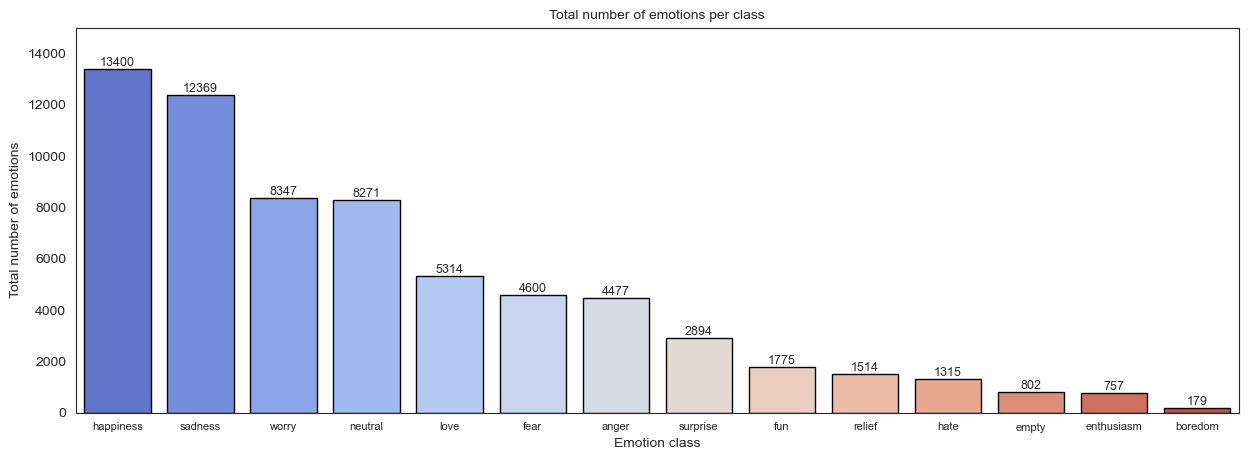

In [75]:
# Plot the distribution of emotions across the whole dataset
x = data["emotion"].value_counts().index
y = data["emotion"].value_counts().values

# Create the plot
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("Emotion class", size=10) 
plt.ylabel("Total number of emotions", size=10)
plt.title("Total number of emotions per class", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 0, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,15000))
plt.show()

In [76]:
def label_race (row):
   if row['emotion'] == 'happiness' :
      return 'yes'
   if row['emotion'] == 'sadness':
      return 'yes'
   if row['emotion'] == 'anger' :
      return 'yes'
   if row['emotion'] == 'love':
      return 'yes'
   if row['emotion']  == 'fear':
      return 'yes'
   if row['emotion'] == 'worry':
      return 'yes'
   return 'no'

data['needed_model'] = data.apply (lambda row: label_race(row), axis=1)

<br>
Looking at the plot of classes distribution we can see that the data is not balanced and emotions like happiness, sadness, worry, neutral take a vast majority of input text.<br>
A model trained with this kind of distribution would be likely biased towards classes with higher frequency while training, <br>
and that is why this imbalanced needs to be addressed during the pre-processing phase.<br>
On the other hand looking at the source of input texts, it is positive that most of them represent happiness.<br>
<br>

Mean word count of text input:  8.063547126367133



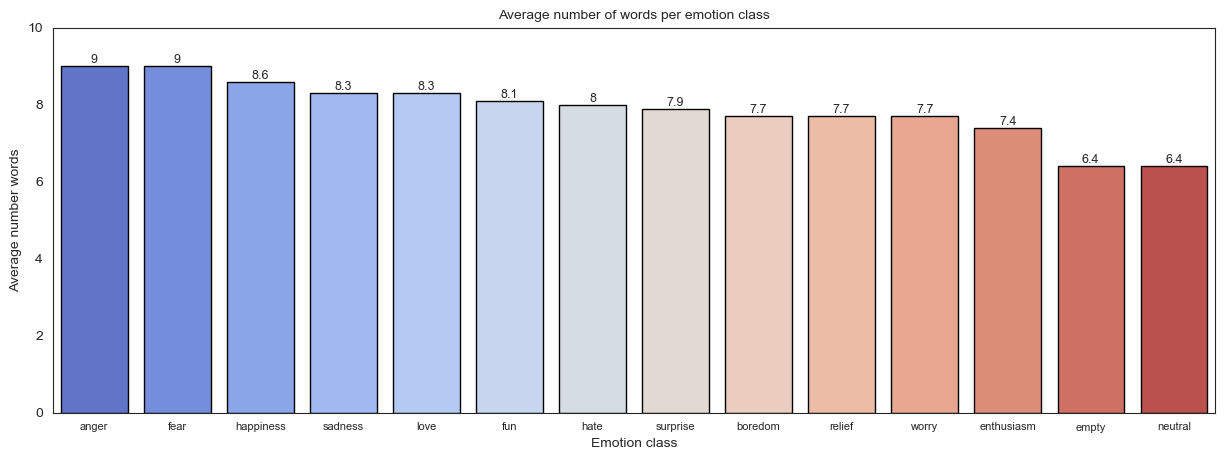

In [77]:
# Calculate the number of words in each text and add it as a new column
data['num_words'] = data['text'].apply(lambda x: len(x.split()))

# Get the avg number of words for the whole dataframe
avg_words = data['num_words'].mean()

# Print results
print('Mean word count of text input: ', avg_words)
print('')

# Group the DataFrame by class and calculate the average number of words for each class
avg_num_words_by_class = data.groupby('emotion')['num_words'].mean()

# Sort values for plotting
avg_num_words_by_class = round(avg_num_words_by_class.sort_values(ascending=False), 1)

x = avg_num_words_by_class.index
y = avg_num_words_by_class.values

# Create the plot
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("Emotion class", size=10) 
plt.ylabel("Average number words", size=10)
plt.title("Average number of words per emotion class", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 0, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,10))
plt.show()

<br>
The plot above shows the average number of words for each emotion class.<br>
We can see that numbers range from 6.3 to around 8.7 having a very small difference between max and min values.<br>
This might be a good indicator as the future model will predict emotions based on a similar text length.<br>
<br>
The average number of words is an important factor to consider in NLP models because it can impact the performance and efficiency of the models. <br>
Here are some reasons why:<br>

- Training time: The length of the text affects the time it takes to train an NLP model. Longer texts take more time to process and analyze, and as a result, the training time increases.<br>

- Memory usage: Longer texts also require more memory to process and store, which can limit the size of the datasets that can be used to train NLP models.<br>

- Model accuracy: The length of the text can affect the accuracy of NLP models. Longer texts may contain more complex and diverse language patterns, <br>
which can make it more difficult for the model to accurately understand and classify the text.<br>

- Model interpretability: Longer texts can also make it harder to interpret the results of NLP models. <br>
It may be more challenging to identify which words or phrases were most influential in the model's decision-making process when analyzing longer texts.<br>

Overall, the average number of characters in NLP models is an important factor to consider to ensure that the models are both accurate and efficient in their processing and analysis of text data.<br>
<br>

Mean length of text input:  50.42790923137516



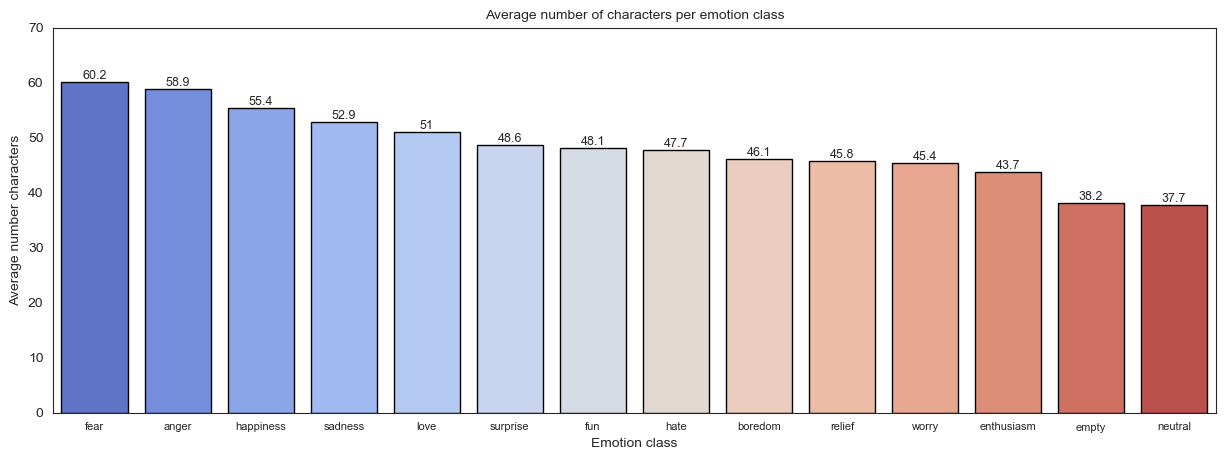

In [78]:
# Create a new column for nr of characters
data['text_length'] = data['text'].apply(len)

# Get the avg number of characters for the whole dataframe
avg_length = data['text_length'].mean()

# Print results
print('Mean length of text input: ', avg_length)
print('')

# Group the DataFrame by class and calculate the average text length for each class
avg_length_by_class = data.groupby('emotion')['text_length'].mean()

# Sort values for plotting
avg_length_by_class = round(avg_length_by_class.sort_values(ascending=False), 1)

x = avg_length_by_class.index
y = avg_length_by_class.values

# Create the plot
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("Emotion class", size=10) 
plt.ylabel("Average number characters", size=10)
plt.title("Average number of characters per emotion class", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 0, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,70))
plt.show()

<br>
The plot above illustrates the average number of characters per emotion class.<br>
We can clearly identify the advantage of anger and fear over other classes. <br>
Together with the previous plot we can draw a conclusion that people tend to use more and longer words to describe those negative emotions.<br>
Other than that, the numbers are quite close to each other with no extremas.<br> 
<br>
Next, we will take a look at the n-grams, in the dataset<br>
<Br>
In natural language processing (NLP), n-grams are contiguous sequences of n items (usually words) from a given text. <br> 
These n-grams can be used to represent the text and extract various linguistic features from it.<br> 

N-grams are commonly used in NLP tasks such as text classification, language modeling, and machine translation. <br> 
They are particularly useful for language modeling, which involves predicting the next word in a sequence given the previous words.<br> 

For example, consider the sentence "The cat sat on the mat." Some examples of n-grams for this sentence are:<br> 

- Unigrams (n=1): "The", "cat", "sat", "on", "the", "mat"<br> 
- Bigrams (n=2): "The cat", "cat sat", "sat on", "on the", "the mat"<br> 
- Trigrams (n=3): "The cat sat", "cat sat on", "sat on the", "on the mat"<br> 

N-grams can be used to extract features from text data for various NLP tasks. For example, in text classification, <br> 
the frequency of n-grams can be used as input features to a classifier. In language modeling, n-grams can be used to predict the next word in a sequence.<br> 
<br> 
However, it's important to note that as the value of n increases, the number of possible n-grams increases exponentially, <br> 
which can result in sparsity and computational complexity. Therefore, selecting an appropriate value of n is an important consideration when using n-grams in NLP tasks.<br> 
<br> 

In [79]:
# Defining a function to get the n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

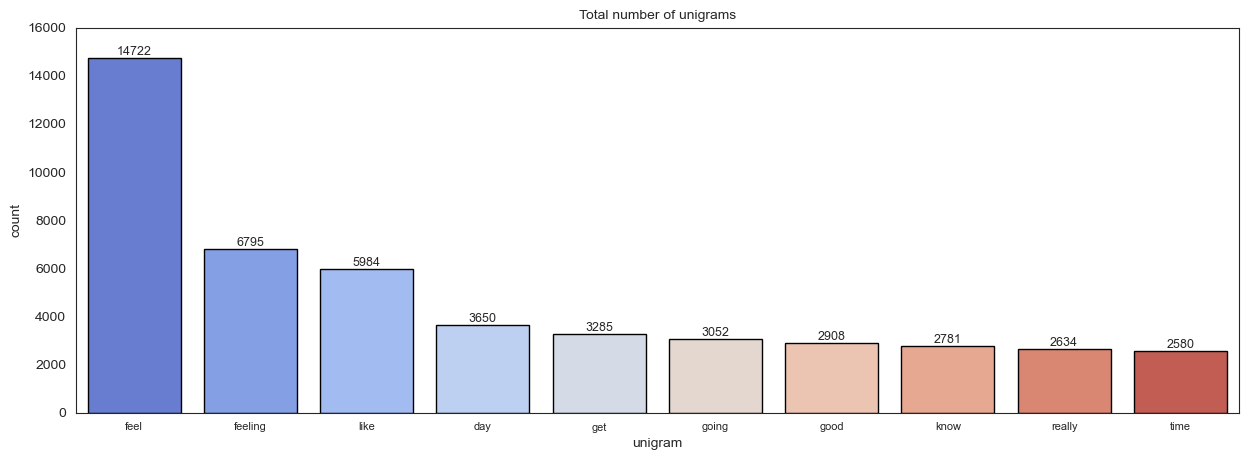

In [80]:
# Call the function to get n-grams
top_n_bigrams = get_top_ngram(data['text'],1)[:10] 

# Mapping x and y for plotting
x,y=map(list,zip(*top_n_bigrams)) 

# Create the plot
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("unigram", size=10) 
plt.ylabel("count", size=10)
plt.title("Total number of unigrams", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 0, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,16000))
plt.show()

<br>
The word "feel" appears to be much more common in the dataset, with a count of 14,700, compared to "feeling" which has a count of 6,000. <br>
The plot is useful for understanding the relative frequency of these two related words in the dataset, and may provide insight into the sentiment or emotional tone of the text data.<br>
<br>
Plotting unigrams in exploratory data analysis (EDA) for NLP model data is important for several reasons:<br>

- Identify common words: Plotting unigrams can help identify the most common words in the dataset. This can provide insight into the overall <br>
theme or sentiment of the text data and help researchers to better understand the language patterns and vocabulary used in the dataset.<br>

- Feature selection: By plotting unigrams, researchers can identify words that occur frequently in the dataset and use them as input features for NLP models. <br>
This can improve model accuracy and efficiency.<br>

- Data cleaning: Plotting unigrams can also help identify common stop words (such as "the," "and," "a," etc.) that may need to be removed from the dataset to improve model accuracy.<br>

- Comparison of datasets: Plotting unigrams can also be useful for comparing the frequency of words between different datasets. <br> 
This can help identify differences in language use and vocabulary between different populations or contexts.<br>

Overall, plotting unigrams is an important step in the EDA process for NLP model data. <br>
It can help us better understand the language patterns and vocabulary used in the dataset, select input features for models, and improve model accuracy and efficiency.<br>

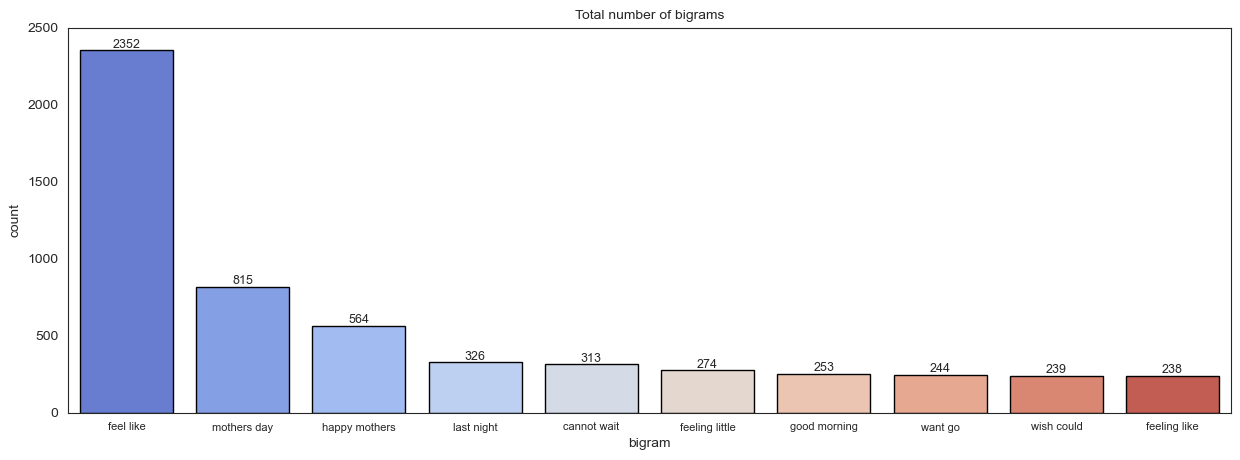

In [81]:
# Call the function to get n-grams
top_n_bigrams = get_top_ngram(data['text'],2)[:10] 

# Mapping x and y for plotting
x,y=map(list,zip(*top_n_bigrams)) 

# Create the plot
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("bigram", size=10) 
plt.ylabel("count", size=10)
plt.title("Total number of bigrams", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 0, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,2500))
plt.show()

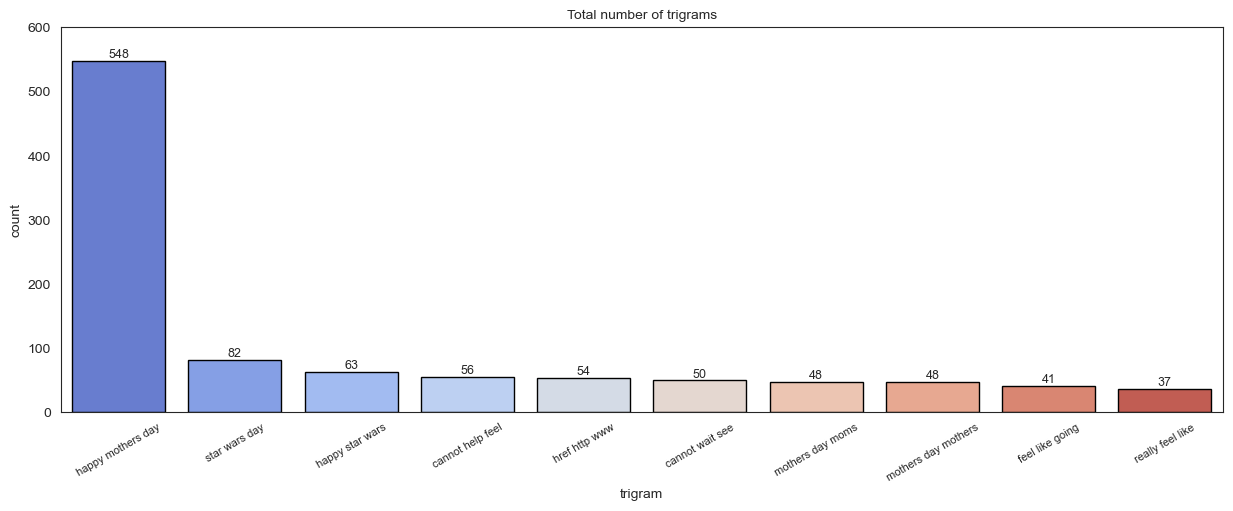

In [82]:
# Call the function to get n-grams
top_n_bigrams = get_top_ngram(data['text'],3)[:10] 

# Mapping x and y for plotting
x,y=map(list,zip(*top_n_bigrams)) 

# Create the plot
sns.set_style("white")
plt.figure(figsize=(15, 5))
plot = sns.barplot(x=x,y=y, palette ='coolwarm',  edgecolor='black')
plt.xlabel("trigram", size=10) 
plt.ylabel("count", size=10)
plt.title("Total number of trigrams", size=10)
plt.bar_label(plot.containers[0],size=9)
plt.xticks(rotation = 30, fontsize=8)
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,600))
plt.show()

<br>
Additionally we have looked at the plots for bigrams and trigrams present in the data. <br>
It helps to identify common phrases and check for possible error like the trigram "href http www" which is not a correct phrase and needs to be removed in the pre-processing phase.<br>
This issue made us realize that words like "href http www" may exists as bigrams and nigrams as well and needs to be checked.<br>
<br>

In [83]:
selected_words = {'href', 'http', 'www', 'img', 'src', 'def'}

data.loc[data['text'].str.contains('|'.join(selected_words)),'text'].value_counts()

hi uploaded 5 completely new chinese lessons www chineselearn please feel free watch enjoy    5
hi thanks following teach chinese lessons youtube pls feel free look www chineselearn         3
hi teach chinese lessons youtube feel free look www chineselearn                              3
awww                                                                                          2
pout tips edge definitely agin feic bakes full make boots heels                               2
                                                                                             ..
waking bladder feels extremely unhappy found type exercise made worse definitely irritated    1
thank feel utterly defeated                                                                   1
feel like explorer life radiant woman photography href http lightsync                         1
must say feel troubled href http emillionstars                                                1
wassup beautiful follow me peep new hit 

In [84]:
data.loc[data['text'].str.contains('|'.join(selected_words)),'text'].value_counts().sum()

1125

In [85]:
pat = '|'.join(r"\b{}\b".format(x) for x in selected_words)

data['text'] = data['text'].str.replace(pat, '')

/var/folders/v9/szm7dr5x3j55c958f77yjjk80000gn/T/ipykernel_61180/3621132639.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(pat, '')


In [86]:
data.loc[data['text'].str.contains('|'.join(selected_words)),'text'].value_counts().sum()

784

<br>
Turns out that there are some more inappropriate words in data that needs to be removed in pre-procesisng phase. They sum up to over 1112 in total.<br>
<br>

#### <b>4. Conclusion:</b> <br>
<br>
Performing this EDA gave us a lot of insights into our collected data as well as made aware of many requirements our future model architecture will have.<br>
By loading, cleaning, computing numbers and plotting we have illustrated the training input to our solution. <Br>
Moreover, this analysis required initial cleaning and data preparation for which steps will be reused in later project phases.<br>
<br>
During the process we came up with points that needs to be addressed in the pre-processing phase:<br>

- engineering required for future pipeline step labels
- balancing the class count
- removing "href http www' trigrams

<br>
<br>
<Br>
<BR>

In [87]:
data.to_csv('SA_model_data_after_EDA')